# Exploratory Data Analisys
## Он же - Разведочный Анализ Данных
Предназначен для предварительного знакомства с данными. Включает в себя достаточно много позиций, но самое главное/базовое:
1) Знакомство - определение размерности данных, количества записей и фичей

2) Расчёт базовых описательных статистик - среднее, дисперсия, СКО и т. д.

3) Визуализация данных

4) Поиск закономерностей и зависимостей

5) Выбор соответствующих моделей на основе пп. 1) - 4)


#### Пайплайн работы с данными:
1) Выгрузка данных или сбор данных из источников

2) EDA: визуализация, нахождение пропущенных значений, поиск корреляций/закономерностей

3) Очистка данных: предвосхитить потенциальные проблемы

4) Построение модели: визуализация, диагностика модели, проверка гетероскедастичности, построение ROC кривых, и т. д. и т. п. 

5) Представление результатов работы: графики, таблички, визаулизации, навести красоту

В качестве тестового датасета разбору подвергнется https://www.kaggle.com/toramky/automobile-dataset - машинки, еее!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Imports Done!")

Imports Done!


In [2]:
PATH = "~/Downloads/automobile_dataset/"
cars_dataset_origin = pd.read_csv(PATH + "Automobile_data.csv")
cars_dataset_origin.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
cars_dataset_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Проверим наличие странных значений.

In [4]:
cars_dataset_origin["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [5]:
cars_dataset_origin["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [6]:
cars_dataset_origin["bore"].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [7]:
cars_dataset_origin["stroke"].unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [8]:
cars_dataset_origin.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
cars_dataset_origin.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Вывод - в данных существует наличие "странных" записей с "?" вместо NA. Такие записи необходимо отвильтровать, либо как-то их изменить. 

In [10]:
df = cars_dataset_origin.copy()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [11]:
df = df.replace({"?" : np.nan})
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
for column in df.columns:
    print('+++++++++++\nCOLUMN_NAME = {} \nVALUES = {}\nTYPE = {}\n-----------'.format(column, 
                                                                                   df[column].unique(), 
                                                                                   df[column].dtype))

+++++++++++
COLUMN_NAME = symboling 
VALUES = [ 3  1  2  0 -1 -2]
TYPE = int64
-----------
+++++++++++
COLUMN_NAME = normalized-losses 
VALUES = [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
TYPE = object
-----------
+++++++++++
COLUMN_NAME = make 
VALUES = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
TYPE = object
-----------
+++++++++++
COLUMN_NAME = fuel-type 
VALUES = ['gas' 'diesel']
TYPE = object
-----------
+++++++++++
COLUMN_NAME = aspiration 
VALUES = ['std' 'turbo']
TYPE = object
-----------
+++++++++++
COLUMN_NAME = num-of-doors 
VALUES = ['two' 'four' n

In [13]:
df = df.astype({"normalized-losses": float, "bore": float, "stroke": float, "horsepower": float,
                "peak-rpm": float, "price": float})
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [14]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Теперь можно заняться заполнением пропущенных значений.
Стратегий замены достаточно много.
Можно сделать простую замену пропущенных значений на среднее, медиану или моду.

Можно использовать деревья решений для предсказания пропущенных значений. Так как датасет небольшой, то для заполнения пропущенных значений можно использовать метод kNN. 

Попробуем два подхода: простой - медиана, сложный - kNN.

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [16]:
# Столбцы с пропущенными значениями и имеющие численный тип
# df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]]
# df.select_dtypes(include=['float64', 'int64'])
tmp = df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]]

In [17]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]])
# df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = imputer.fit_transform(df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]])

In [18]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = imputer.fit_transform(tmp)

In [19]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [20]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
imputer = KNNImputer(n_neighbors=5)
df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = imputer.fit_transform(tmp)

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,123.8,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,144.8,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,144.8,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [23]:
# Необходимо будет в последующем провести "факторизацию" переменных,
# т. е. сделать из них номинативные (категориальные) переменные. 
# df.apply(lambda x: pd.factorize(x)[0])

In [24]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.148293,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.331317,3.256049,10.142537,104.608780,5130.195122,25.219512,30.751220,13251.987317
std,1.245307,32.441668,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.271339,0.313696,3.972040,39.679368,479.586179,6.542142,6.886443,7913.608772
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,98.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,118.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,144.800000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Посчитаем корреляции!

In [25]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465354,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.119759,-0.005199,-0.178515,0.072369,0.271733,-0.035823,0.034606,-0.081036
normalized-losses,0.465354,1.000000,-0.033544,0.038507,0.098272,-0.353658,0.116502,0.092830,-0.010332,0.063871,-0.095318,0.201637,0.205069,-0.233877,-0.192917,0.106514
wheel-base,-0.531954,-0.033544,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.484539,0.159742,0.249786,0.346597,-0.363204,-0.470414,-0.544082,0.581618
length,-0.357612,0.038507,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.602980,0.128660,0.158414,0.555870,-0.280861,-0.670909,-0.704662,0.684692
width,-0.232919,0.098272,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.557568,0.182687,0.181129,0.642279,-0.215689,-0.642704,-0.677218,0.749915
height,-0.541038,-0.353658,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.160999,-0.058718,0.261214,-0.112985,-0.320317,-0.048640,-0.107358,0.125290
curb-weight,-0.227691,0.116502,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.646140,0.167953,0.151362,0.747307,-0.265279,-0.757414,-0.797465,0.832115
engine-size,-0.105790,0.092830,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.575615,0.200180,0.028971,0.808532,-0.242033,-0.653658,-0.677470,0.872351
bore,-0.119759,-0.010332,0.484539,0.602980,0.557568,0.160999,0.646140,0.575615,1.000000,-0.056079,0.004107,0.579008,-0.237542,-0.591241,-0.592446,0.547308
stroke,-0.005199,0.063871,0.159742,0.128660,0.182687,-0.058718,0.167953,0.200180,-0.056079,1.000000,0.185672,0.105653,-0.042047,-0.044614,-0.046204,0.079705


In [26]:
# sns.heatmap(df.corr(), annot=True, fmt='.2f')
# Так делать не надо!

In [45]:
CorrKoef = df.corr()
CorField = []

for i in CorrKoef:
    for j in CorrKoef.index[abs(CorrKoef[i]) > 0.65]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print("Correlation coefficient between {} and {} is {}.".format(i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

Correlation coefficient between wheel-base and length is 0.8745874759642641.
Correlation coefficient between wheel-base and width is 0.7951436436169699.
Correlation coefficient between wheel-base and curb-weight is 0.7763863277822105.
Correlation coefficient between engine-size and horsepower is 0.808532394876433.
Correlation coefficient between engine-size and city-mpg is -0.6536579163114202.
Correlation coefficient between engine-size and highway-mpg is -0.6774699078386548.
Correlation coefficient between engine-size and price is 0.8723514915906091.


Коэффициент корреляции между ценой и размером двигателя высок. Посмотрим как выглядит зависимость!

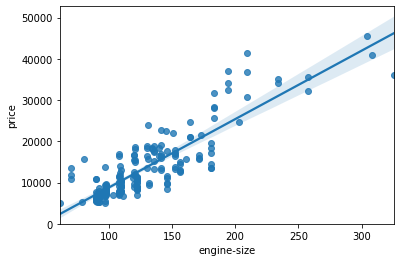

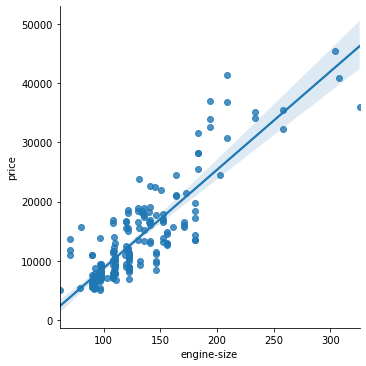

In [38]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
# или
sns.lmplot(x="engine-size", y="price", data=df)

In [44]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.696304
price,-0.696304,1.000000


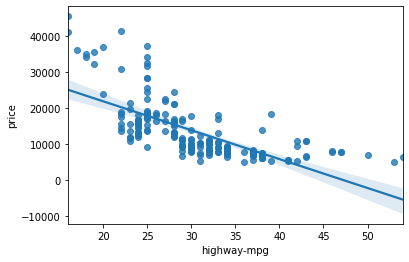

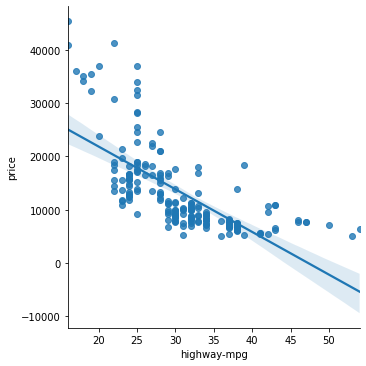

In [46]:
sns.regplot(x="highway-mpg", y="price", data=df)
# или
sns.lmplot(x="highway-mpg", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

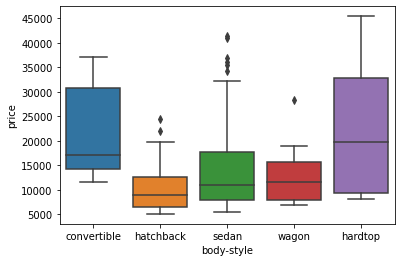

In [47]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

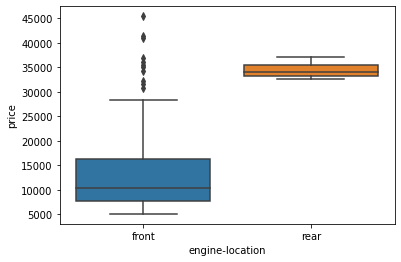

In [48]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

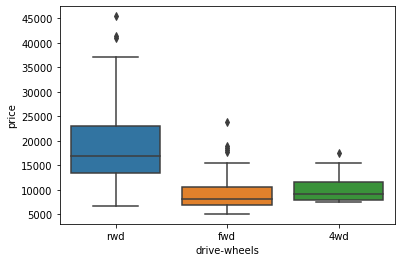

In [49]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [50]:
from scipy import stats

In [52]:
cols = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight',
       'engine-size', 'bore', 'city-mpg', 'highway-mpg']

for col in cols: 
    pearson_coef, p_value = stats.pearsonr(df[col], df['price'])
    print("PearsonR между {} и price {} с P-значением P = {}".format(
          col, pearson_coef, p_value ))
    
    if p_value < 0.001:
        print('Корреляция между {} и price статистически значимая'.format(col))
    elif p_value < 0.05:
        print('Корреляция между {} и price средняя'.format(col))
    elif p_value < 0.1:
        print('Корреляция между {} и price слабая'.format(col))
    else:
        print('Корреляция между {} и price статистически незначимая'.format(col))
        
    if pearson_coef > 0 :
        if pearson_coef > 0.85:
            print('Коэффициент ~{} показывает положительную очень сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.75 :
            print('Коэффициент ~{} показывает положительную достаточно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.60:
            print('Коэффициент ~{} показывает положительную относительно сильную связь\n'.format(pearson_coef))
        elif pearson_coef > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))
    else:
        if abs(pearson_coef) > 0.85:
            print('Коэффициент ~{} показывает негативную очень сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.75 :
            print('Коэффициент ~{} показывает негативную достаточно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.60:
            print('Коэффициент ~{} показывает негативную относительно сильную связь\n'.format(pearson_coef))
        elif abs(pearson_coef) > 0.50 :
            print('Коэффициент ~{} показывает положительную среднюю связь\n'.format(pearson_coef))
        else:
            print('Коэффициент ~{} показывает положительную слабую связь\n'.format(pearson_coef))

PearsonR между wheel-base и price 0.5816181644258469 с P-значением P = 5.990000216935889e-20
Корреляция между wheel-base и price статистически значимая
Коэффициент ~0.5816181644258469 показывает положительную среднюю связь

PearsonR между horsepower и price 0.7835138829532775 с P-значением P = 7.998386048411277e-44
Корреляция между horsepower и price статистически значимая
Коэффициент ~0.7835138829532775 показывает положительную достаточно сильную связь

PearsonR между length и price 0.6846918612022589 с P-значением P = 1.05497671458761e-29
Корреляция между length и price статистически значимая
Коэффициент ~0.6846918612022589 показывает положительную относительно сильную связь

PearsonR между width и price 0.7499145071670148 с P-значением P = 2.774617686453583e-38
Корреляция между width и price статистически значимая
Коэффициент ~0.7499145071670148 показывает положительную относительно сильную связь

PearsonR между curb-weight и price 0.8321148365738248 с P-значением P = 7.161208108396